Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 2

Пример создания модели с Unet-подобной архитектурой

In [1]:
from tensorflow.keras import Model, Input
from keras.layers import Conv2D, MaxPooling2D, concatenate, UpSampling2D, Dropout, Cropping2D, Softmax, Conv2DTranspose
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model

In [3]:
def mini_u_net(image_shape, num_of_classes):
  
  input_image = Input(image_shape)

  # Encoder
  
  conv1_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
  conv1_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(conv1_1)
  
  pool_1 = MaxPooling2D(name = 'pool_1')(conv1_2)
  
  conv2_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
  conv2_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(conv2_1)
  
  pool_2 = MaxPooling2D(name = 'pool_2')(conv2_2)
  
  conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
  conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(conv3_1)
  
  pool_3 = MaxPooling2D(name = 'pool_3')(conv3_2)
  
  conv4_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
  conv4_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(conv4_1)
  
  
  
  # Decoder
  
  upconv5_1 = UpSampling2D(name = 'upconv5_1')(conv4_2)
  upconv5_2 = Conv2D(filters = 128, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv5_2')(upconv5_1)
  concat_5 = concatenate([upconv5_2, conv3_2], axis = 3, name = 'concat_5') # Split Connections
  
  conv5_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(concat_5)
  conv5_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(conv5_1)
  
  
  upconv6_1 = UpSampling2D(name = 'upconv6_1')(conv5_2)
  upconv6_2 = Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv6_2')(upconv6_1)
  concat_6 = concatenate([upconv6_2, conv2_2], axis = 3, name = 'concat_6') # Split Connections
  
  conv6_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_6)
  conv6_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(conv6_1)
  
  upconv7_1 = UpSampling2D(name = 'upconv7_1')(conv6_2)
  upconv7_2 = Conv2D(filters = 32, kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_2')(upconv7_1)
  concat_7 = concatenate([upconv7_2, conv1_2], axis = 3, name = 'concat_7') # Split Connections
  
  conv7_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_7)
  conv7_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(conv7_1)
  
  conv8 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv8')(conv7_2)
  
  model = Model(inputs = input_image, outputs = conv8, name = 'model')
  
  return model

In [4]:
unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

Описание и визуализация архитектуры созданной модели

In [5]:
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_2 (Conv2D)               (None, 256, 256, 32  9248        ['conv1_1[0][0]']                
                                )                                                             

In [6]:
unet_model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1_1',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config':

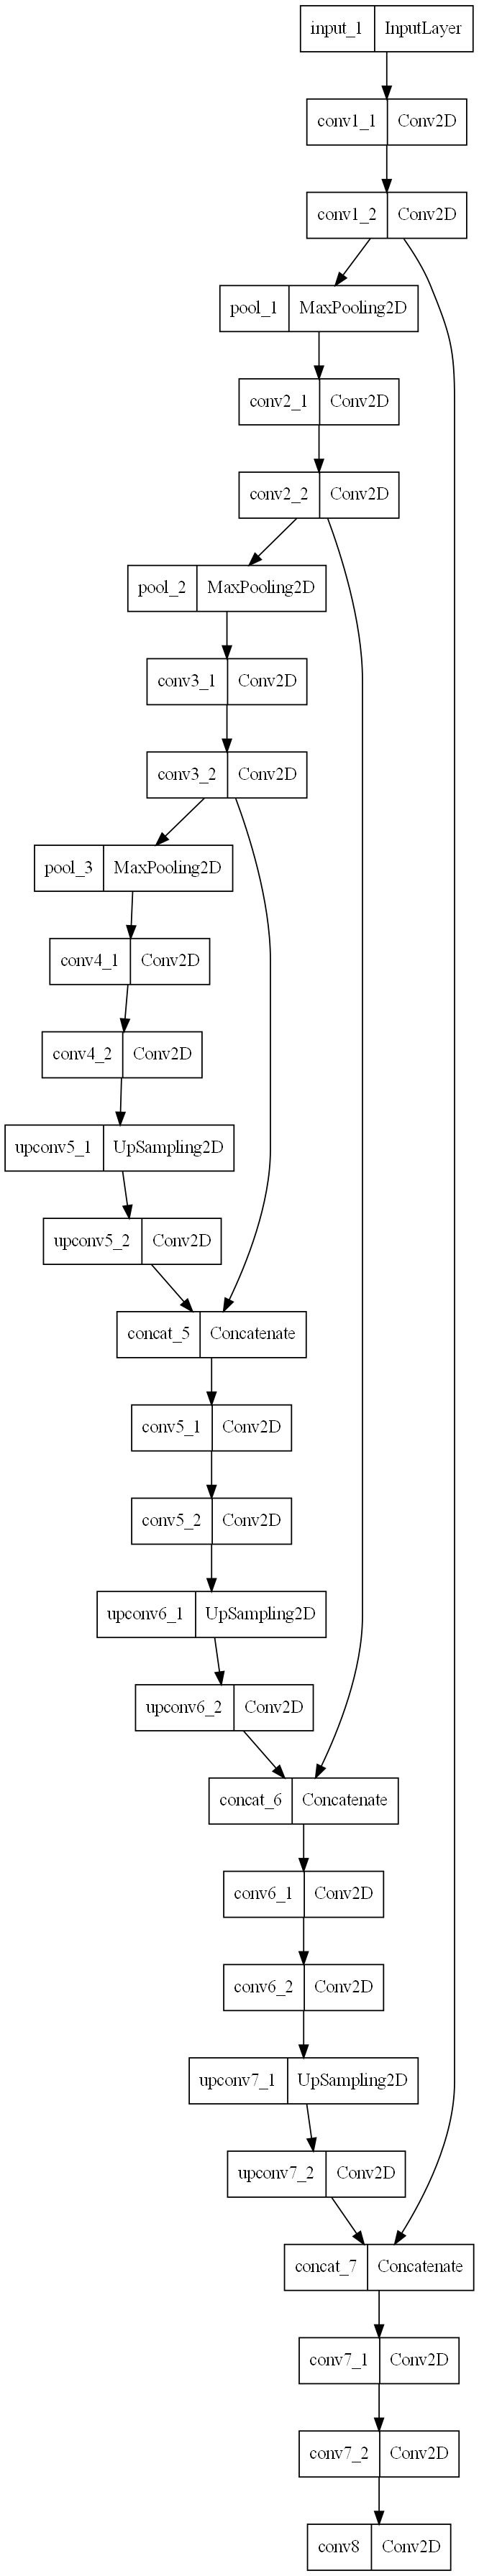

In [23]:
plot_model(unet_model, 
           to_file='model.png', 
           show_shapes=False, 
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=128
)

Задание №1. Создайте модель со следующей архитектурой

In [16]:
def mini_u_net(image_shape, num_of_classes):
  
    input_image = Input(image_shape)

    # Encoder
    
    conv1_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_1')(input_image)
    dropout1_1 = Dropout(rate=0.2)(conv1_1)
    conv1_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv1_2')(dropout1_1)

    pool_1 = MaxPooling2D(pool_size=(2,2), name = 'pool_1')(conv1_2)

    conv2_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_1')(pool_1)
    dropout2_1 = Dropout(rate=0.2)(conv2_1)
    conv2_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2_2')(dropout2_1)

    pool_2 = MaxPooling2D(pool_size=(2,2), name = 'pool_2')(conv2_2)

    conv3_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_1')(pool_2)
    dropout3_1 = Dropout(rate=0.2)(conv3_1)
    conv3_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv3_2')(dropout3_1)

    pool_3 = MaxPooling2D(pool_size=(2,2), name = 'pool_3')(conv3_2)

    conv4_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_1')(pool_3)
    dropout4_1 = Dropout(rate=0.2)(conv4_1)
    conv4_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4_2')(dropout4_1)


    pool_4 = MaxPooling2D(pool_size=(2,2), name = 'pool_4')(conv4_2)


    conv5_1 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_1')(pool_4)
    dropout5_1 = Dropout(rate=0.2)(conv5_1)
    conv5_2 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv5_2')(dropout5_1)
    
    # Decoder

    upconv5_1 = Conv2DTranspose(filters = 128, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv5_1')(conv5_2)

    concat_5 = concatenate([upconv5_1, conv4_2], axis = 3, name = 'concat_5') # Split Connections


    conv6_1 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_1')(concat_5)
    dropout6_1 = Dropout(rate=0.2)(conv6_1)
    conv6_2 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv6_2')(dropout6_1)
    upconv6_1 = Conv2DTranspose(filters = 64, kernel_size = (2, 2), strides=(2, 2), activation = 'linear', padding = 'same', name = 'upconv6_1')(conv6_2)

    concat_6 = concatenate([upconv6_1, conv3_2], axis = 3, name = 'concat_6') # Split Connections

    conv7_1 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_1')(concat_6)
    dropout7_1 = Dropout(rate=0.2)(conv7_1)
    conv7_2 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv7_2')(dropout7_1)
    upconv7_1 = Conv2DTranspose(filters = 32, strides=(2, 2), kernel_size = (2, 2), activation = 'relu', padding = 'same', name = 'upconv7_1')(conv7_2)

    concat_7 = concatenate([upconv7_1, conv2_2], axis = 3, name = 'concat_7') # Split Connections

    conv8_1 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_1')(concat_7)
    dropout8_1 = Dropout(rate=0.2)(conv8_1)
    conv8_2 = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv8_2')(dropout8_1)
    upconv8_1 = Conv2DTranspose(filters = 16, strides=(2, 2), kernel_size = (2, 2), activation = 'linear', padding = 'same', name = 'upconv8_1')(conv8_2)

    concat_8 = concatenate([upconv8_1, conv1_2], axis = 3, name = 'concat_8') # Split Connections
    

    conv9_1 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_1')(concat_8)
    dropout9_1 = Dropout(rate=0.2)(conv9_1)
    conv9_2 = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv9_2')(dropout9_1)

    conv10 = Conv2D(filters = num_of_classes, kernel_size = (1, 1), activation = 'softmax', name = 'conv10')(conv9_2)

    model = Model(inputs = input_image, outputs = conv10, name = 'model')

    return model

In [17]:
my_unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)

In [18]:
my_unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 16  448         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_9 (Dropout)            (None, 256, 256, 16  0           ['conv1_1[0][0]']                
                                )                                                             

In [19]:
my_unet_model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_3'},
   'name': 'input_3',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1_1',
   'inbound_nodes': [[['input_3', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config'

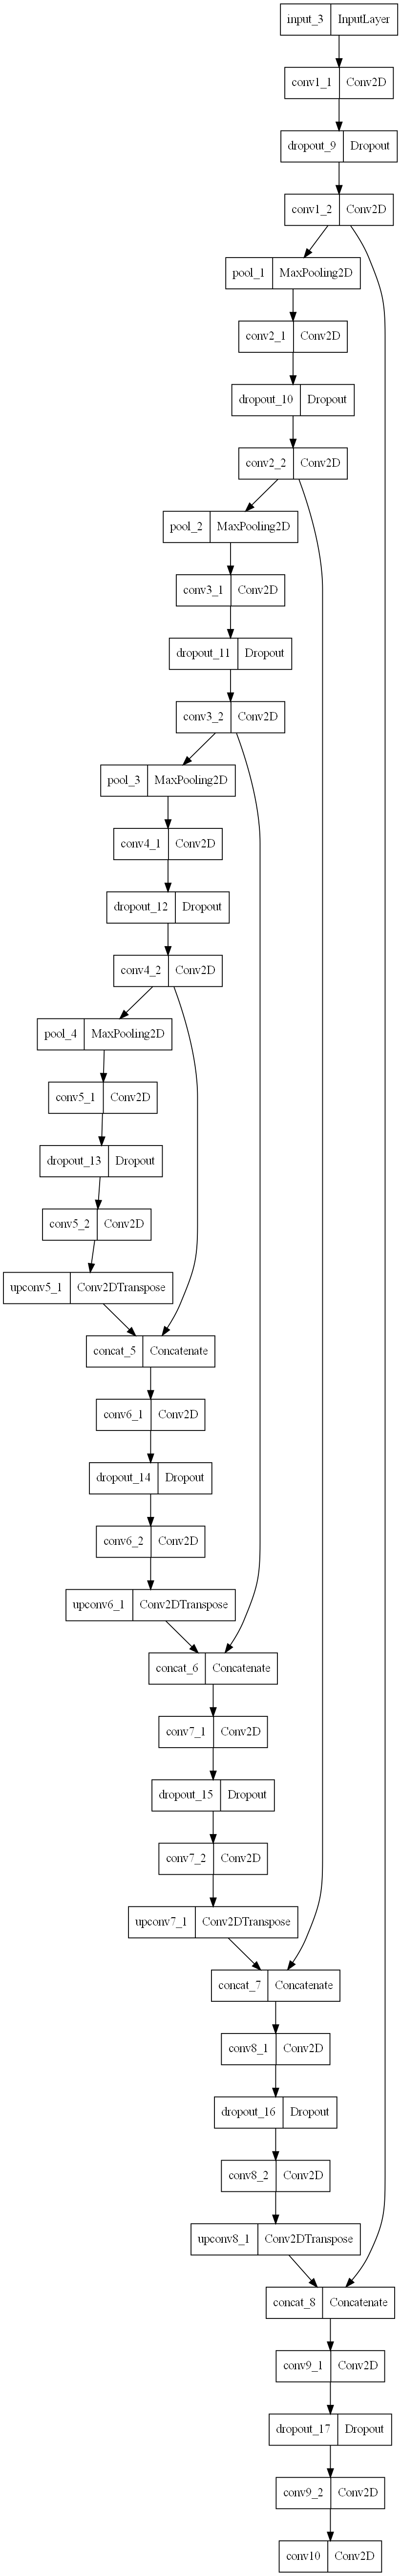

In [24]:
plot_model(my_unet_model, 
           to_file='my_model.png', 
           show_shapes=False, 
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=128
)

Задание №2. Обучите созданную модель для решения задачи семантической сегментации. В качестве функции потерь используйте ту, которая лучше всего показала себя в первой части работы

In [27]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import segmentation_models as sm
sm.set_framework('tf.keras')
from keras.metrics import MeanIoU
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print(f'Segmentaion models framework: {sm.framework()}')

Segmentaion models framework: tf.keras


In [28]:
train_img_dir = 'datasets/dataset/train_image/train'
train_mask_dir = 'datasets/dataset/train_mask/train'

train_img_list = sorted(os.listdir(train_img_dir))
train_msk_list = sorted(os.listdir(train_mask_dir))

train_num_images = len(os.listdir(train_img_dir))

In [29]:
val_img_dir = 'datasets/dataset/val_image/val'
val_mask_dir = 'datasets/dataset/val_mask/val'

val_img_list = sorted(os.listdir(val_img_dir))
val_msk_list = sorted(os.listdir(val_mask_dir))

val_num_images = len(os.listdir(val_img_dir))

In [31]:
print(f'Training images: {train_num_images}')
print(f'Validation images: {val_num_images}')

Training images: 411
Validation images: 138


In [32]:
Building = np.array((60, 16, 152))
Land = np.array((132, 41, 246))
Road = np.array((110, 193, 228))
Vegetation = np.array((254, 221, 58))
Water = np.array((226, 169, 41))
Unlabeled = np.array((155, 155, 155))

In [33]:
def rgb_to_2D_label(label):
    """
    Преобразовать массив пикселей маски в массив из номеров классов
    """
    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg[np.all(label == Building,axis=-1)] = 0
    label_seg[np.all(label==Land,axis=-1)] = 1
    label_seg[np.all(label==Road,axis=-1)] = 2
    label_seg[np.all(label==Vegetation,axis=-1)] = 3
    label_seg[np.all(label==Water,axis=-1)] = 4
    label_seg[np.all(label==Unlabeled,axis=-1)] = 5

    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

In [34]:
seed=24
batch_size=8
n_classes=6

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
from keras.preprocessing.image import ImageDataGenerator

def preprocess_data(img, mask, num_class):
    new_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)    
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
    return (new_img, mask)

def trainGenerator(train_img_path, train_mask_path, num_class):
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [37]:
train_img_path = 'datasets/dataset/train_image'
train_mask_path = 'datasets/dataset/train_mask'

val_img_path = 'datasets/dataset/val_image'
val_mask_path = 'datasets/dataset/val_mask'

train_img_gen = trainGenerator(train_img_path, train_mask_path, n_classes)
val_img_gen = trainGenerator(val_img_path, val_mask_path, n_classes)

num_train_imgs = len(os.listdir(f'{train_img_path}/train'))
num_val_imgs = len(os.listdir(f'{val_img_path}/val'))

steps_per_epoch = num_train_imgs // batch_size
val_steps_per_epoch = num_val_imgs // batch_size

print(f'Train generator steps per epoch: {steps_per_epoch}')
print(f'Validation generator steps per epoch: {val_steps_per_epoch}')

Train generator steps per epoch: 51
Validation generator steps per epoch: 17


In [39]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]

my_unet_model = mini_u_net(image_shape = [256, 256, 3], num_of_classes = 6)
my_unet_model.compile(optimizer='adam', loss=sm.losses.categorical_focal_dice_loss, metrics=metrics)
my_unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_1 (Conv2D)               (None, 256, 256, 16  448         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_27 (Dropout)           (None, 256, 256, 16  0           ['conv1_1[0][0]']                
                                )                                                             

In [41]:
history = my_unet_model.fit(
    train_img_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_steps=val_steps_per_epoch,
    validation_data=val_img_gen,
    verbose=1
)

Epoch 1/50
51/51 [==============================] - 6s 123ms/step - loss: 0.3940 - accuracy: 0.8284 - iou_score: 0.5307 - f1-score: 0.6339 - val_loss: 0.4018 - val_accuracy: 0.8121 - val_iou_score: 0.5262 - val_f1-score: 0.6334
Epoch 2/50
51/51 [==============================] - 6s 122ms/step - loss: 0.4019 - accuracy: 0.8254 - iou_score: 0.5250 - f1-score: 0.6278 - val_loss: 0.4108 - val_accuracy: 0.8031 - val_iou_score: 0.5200 - val_f1-score: 0.6260
Epoch 3/50
51/51 [==============================] - 6s 122ms/step - loss: 0.4035 - accuracy: 0.8377 - iou_score: 0.5225 - f1-score: 0.6222 - val_loss: 0.3908 - val_accuracy: 0.8150 - val_iou_score: 0.5392 - val_f1-score: 0.6430
Epoch 4/50
51/51 [==============================] - 6s 120ms/step - loss: 0.3985 - accuracy: 0.8344 - iou_score: 0.5303 - f1-score: 0.6311 - val_loss: 0.4008 - val_accuracy: 0.8259 - val_iou_score: 0.5334 - val_f1-score: 0.6348
Epoch 5/50
51/51 [==============================] - 6s 121ms/step - loss: 0.3945 - accur

In [42]:
my_unet_model.save('models/my_unet_model.h5')

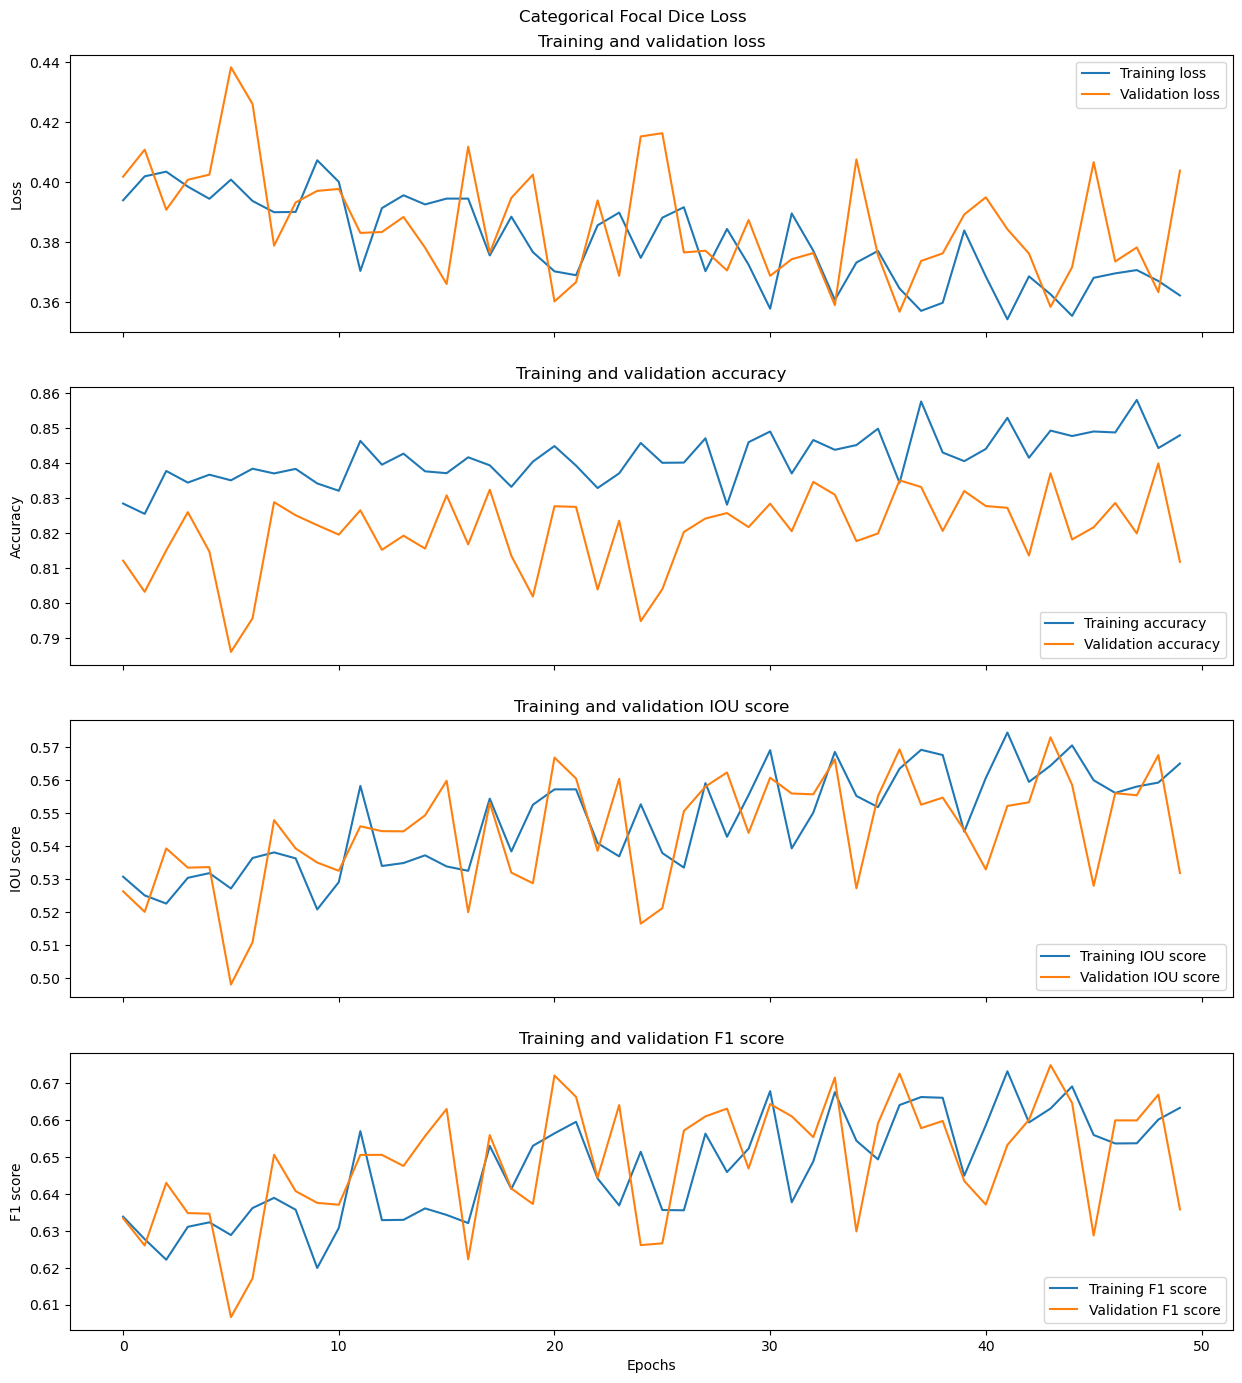

In [43]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)

 
display_training(history, 'Categorical Focal Dice Loss')

Found 138 images belonging to 1 classes.
Found 138 images belonging to 1 classes.
1/1 [==============================] - 0s 132ms/step


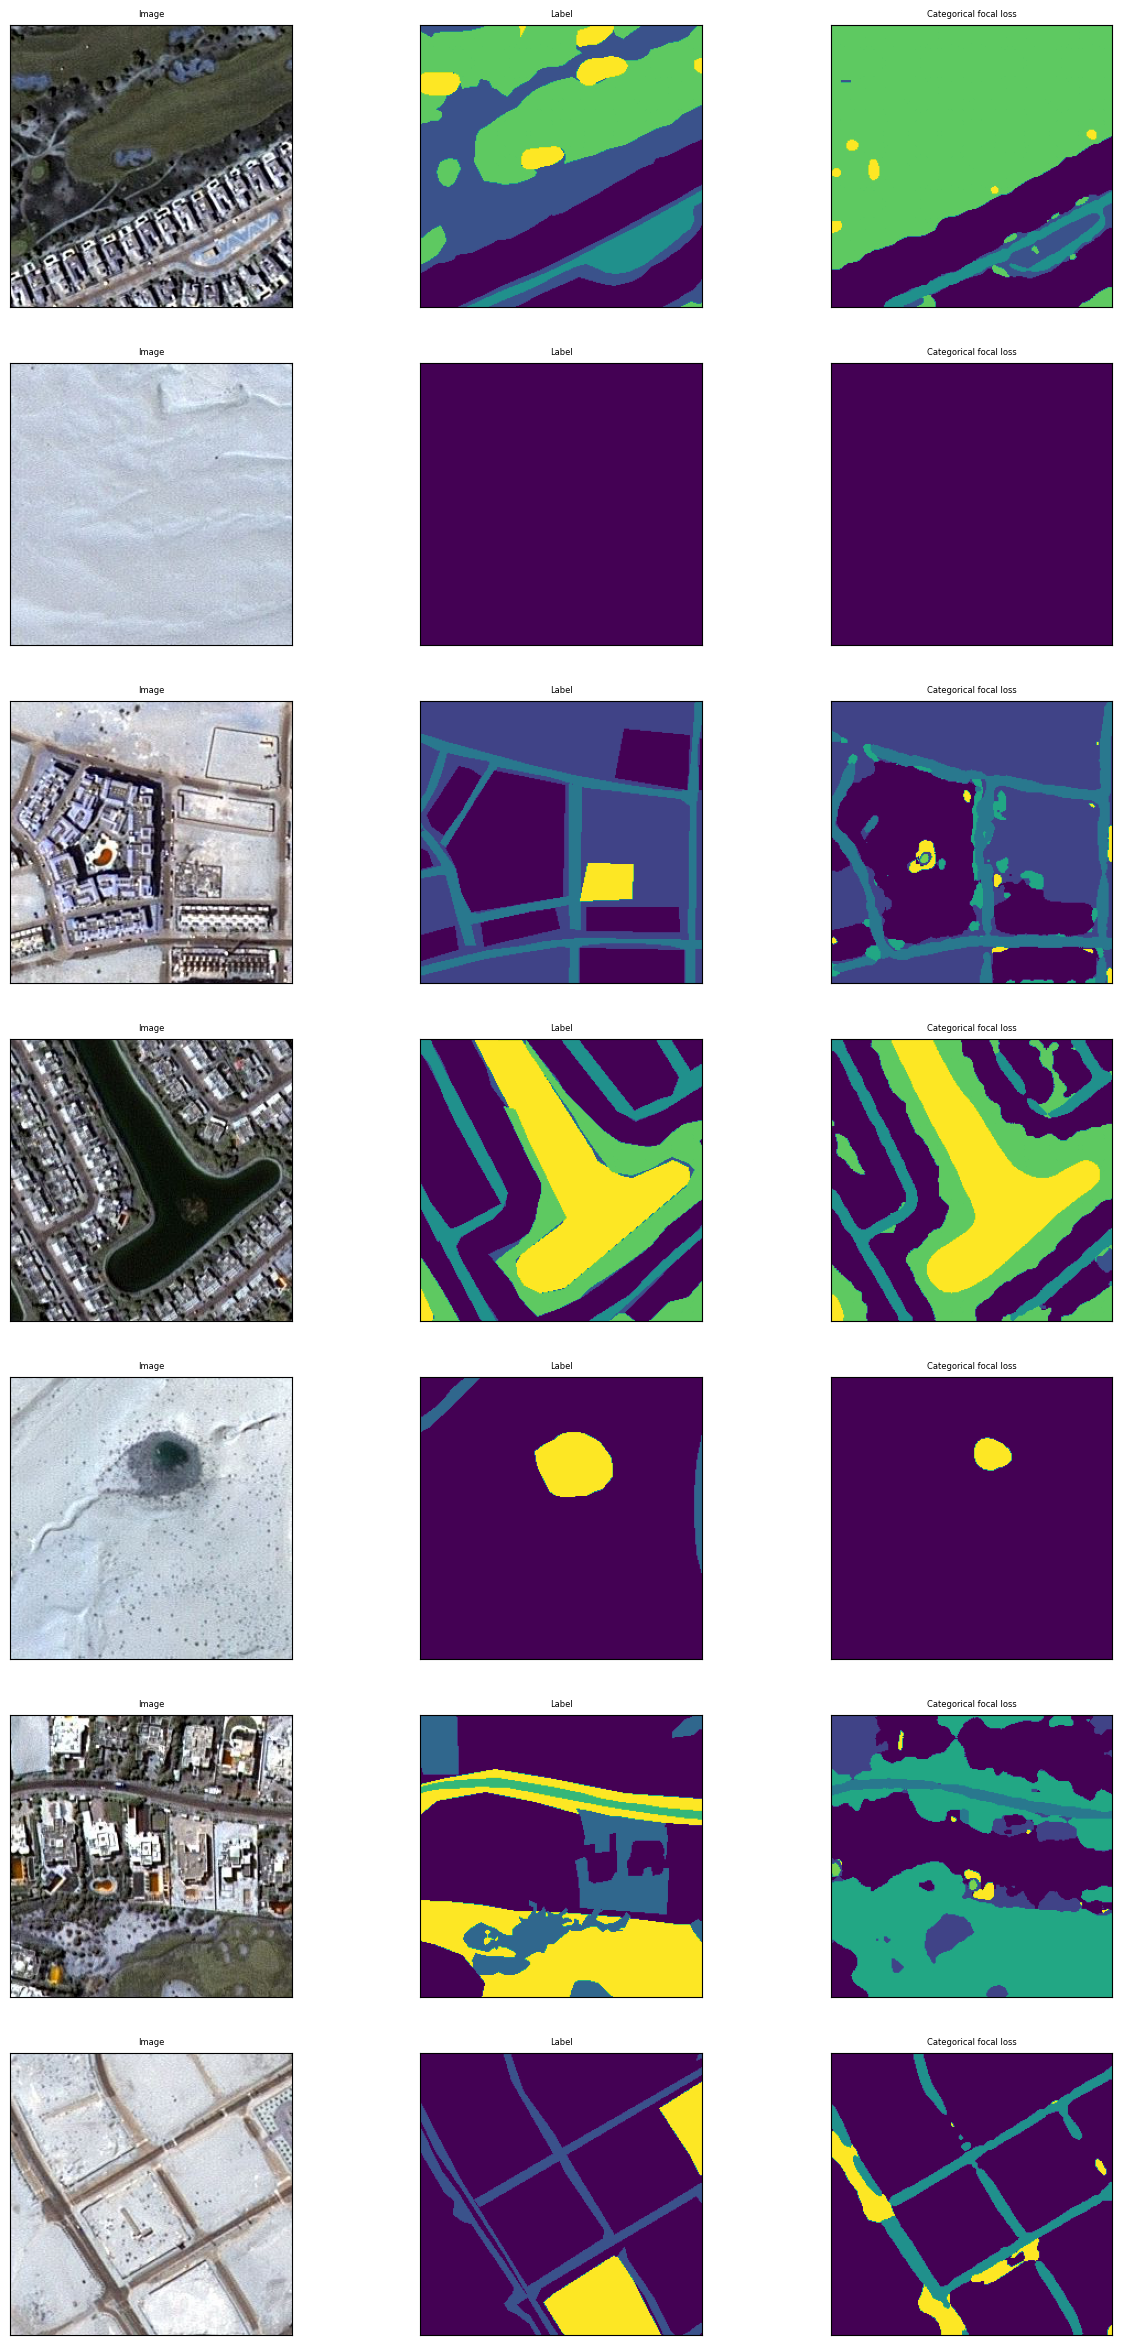

In [44]:
from keras import models

models = [
    models.load_model('models/my_unet_model.h5', compile=False),
]

val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)
image_batch, mask_batch = next(val_img_gen)
mask_batch = np.argmax(mask_batch, axis=3)

predictions = [np.argmax(model.predict(image_batch), axis=3) for model in models]

image_count = image_batch.shape[0] - 1

# 6 - оригинал + маска + 4 предсказания
fig, axis = plt.subplots(image_count, 3)
fig.set_figwidth(15)
fig.set_figheight(30)

for i in range(image_count):
    axis[i][0].imshow(image_batch[i])
    axis[i][0].set_title('Image', fontsize = 6)
    axis[i][0].axes.xaxis.set_visible(False)
    axis[i][0].axes.yaxis.set_visible(False)

    axis[i][1].imshow(mask_batch[i])
    axis[i][1].set_title("Label", fontsize = 6)
    axis[i][1].axes.xaxis.set_visible(False)
    axis[i][1].axes.yaxis.set_visible(False)

    axis[i][2].imshow(predictions[0][i])
    axis[i][2].set_title("Categorical focal loss", fontsize = 6)
    axis[i][2].axes.xaxis.set_visible(False)
    axis[i][2].axes.yaxis.set_visible(False)

plt.show()

2.1 Загрузите три снимка, а также маски, соответствующие этим снимкам, из папки Tiles 8

In [45]:
"""

Original code is from the following source. It comes with MIT License so please mention
the original reference when sharing.

The original code has been modified to fix a couple of bugs and chunks of code
unnecessary for smooth tiling are removed. 

# MIT License
# Copyright (c) 2017 Vooban Inc.
# Coded by: Guillaume Chevalier
# Source to original code and license:
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches/blob/master/LICENSE

"""
"""Perform smooth predictions on an image from tiled prediction patches."""


import numpy as np
import scipy.signal
from tqdm import tqdm

import gc


if __name__ == '__main__':
    import matplotlib.pyplot as plt
    PLOT_PROGRESS = False
    # See end of file for the rest of the __main__.
else:
    PLOT_PROGRESS = False


def _spline_window(window_size, power=2):
    """
    Squared spline (power=2) window function:
    https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
    """
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    return wind


cached_2d_windows = dict()
def _window_2D(window_size, power=2):
    """
    Make a 1D window function, then infer and return a 2D window function.
    Done with an augmentation, and self multiplication with its transpose.
    Could be generalized to more dimensions.
    """
    # Memoization
    global cached_2d_windows
    key = "{}_{}".format(window_size, power)
    if key in cached_2d_windows:
        wind = cached_2d_windows[key]
    else:
        wind = _spline_window(window_size, power)
        wind = np.expand_dims(np.expand_dims(wind, 1), 1)      #SREENI: Changed from 3, 3, to 1, 1 
        wind = wind * wind.transpose(1, 0, 2)
        if PLOT_PROGRESS:
            # For demo purpose, let's look once at the window:
            plt.imshow(wind[:, :, 0], cmap="viridis")
            plt.title("2D Windowing Function for a Smooth Blending of "
                      "Overlapping Patches")
            plt.show()
        cached_2d_windows[key] = wind
    return wind


def _pad_img(img, window_size, subdivisions):
    """
    Add borders to img for a "valid" border pattern according to "window_size" and
    "subdivisions".
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    more_borders = ((aug, aug), (aug, aug), (0, 0))
    ret = np.pad(img, pad_width=more_borders, mode='reflect')
    # gc.collect()

    if PLOT_PROGRESS:
        # For demo purpose, let's look once at the window:
        plt.imshow(ret)
        plt.title("Padded Image for Using Tiled Prediction Patches\n"
                  "(notice the reflection effect on the padded borders)")
        plt.show()
    return ret


def _unpad_img(padded_img, window_size, subdivisions):
    """
    Undo what's done in the `_pad_img` function.
    Image is an np array of shape (x, y, nb_channels).
    """
    aug = int(round(window_size * (1 - 1.0/subdivisions)))
    ret = padded_img[
        aug:-aug,
        aug:-aug,
        :
    ]
    # gc.collect()
    return ret


def _rotate_mirror_do(im):
    """
    Duplicate an np array (image) of shape (x, y, nb_channels) 8 times, in order
    to have all the possible rotations and mirrors of that image that fits the
    possible 90 degrees rotations.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    mirrs = []
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    im = np.array(im)[:, ::-1]
    mirrs.append(np.array(im))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=1))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=2))
    mirrs.append(np.rot90(np.array(im), axes=(0, 1), k=3))
    return mirrs


def _rotate_mirror_undo(im_mirrs):
    """
    merges a list of 8 np arrays (images) of shape (x, y, nb_channels) generated
    from the `_rotate_mirror_do` function. Each images might have changed and
    merging them implies to rotated them back in order and average things out.
    It is the D_4 (D4) Dihedral group:
    https://en.wikipedia.org/wiki/Dihedral_group
    """
    origs = []
    origs.append(np.array(im_mirrs[0]))
    origs.append(np.rot90(np.array(im_mirrs[1]), axes=(0, 1), k=3))
    origs.append(np.rot90(np.array(im_mirrs[2]), axes=(0, 1), k=2))
    origs.append(np.rot90(np.array(im_mirrs[3]), axes=(0, 1), k=1))
    origs.append(np.array(im_mirrs[4])[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[5]), axes=(0, 1), k=3)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[6]), axes=(0, 1), k=2)[:, ::-1])
    origs.append(np.rot90(np.array(im_mirrs[7]), axes=(0, 1), k=1)[:, ::-1])
    return np.mean(origs, axis=0)


def _windowed_subdivs(padded_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Create tiled overlapping patches.
    Returns:
        5D numpy array of shape = (
            nb_patches_along_X,
            nb_patches_along_Y,
            patches_resolution_along_X,
            patches_resolution_along_Y,
            nb_output_channels
        )
    Note:
        patches_resolution_along_X == patches_resolution_along_Y == window_size
    """
    WINDOW_SPLINE_2D = _window_2D(window_size=window_size, power=2)

    step = int(window_size/subdivisions)
    padx_len = padded_img.shape[0]
    pady_len = padded_img.shape[1]
    subdivs = []

    for i in range(0, padx_len-window_size+1, step):
        subdivs.append([])
        for j in range(0, pady_len-window_size+1, step):            #SREENI: Changed padx to pady (Bug in original code)
            patch = padded_img[i:i+window_size, j:j+window_size, :]
            subdivs[-1].append(patch)

    # Here, `gc.collect()` clears RAM between operations.
    # It should run faster if they are removed, if enough memory is available.
    gc.collect()
    subdivs = np.array(subdivs)
    gc.collect()
    a, b, c, d, e = subdivs.shape
    subdivs = subdivs.reshape(a * b, c, d, e)
    gc.collect()

    subdivs = pred_func(subdivs)
    gc.collect()
    subdivs = np.array([patch * WINDOW_SPLINE_2D for patch in subdivs])
    gc.collect()

    # Such 5D array:
    subdivs = subdivs.reshape(a, b, c, d, nb_classes)
    gc.collect()

    return subdivs


def _recreate_from_subdivs(subdivs, window_size, subdivisions, padded_out_shape):
    """
    Merge tiled overlapping patches smoothly.
    """
    step = int(window_size/subdivisions)
    padx_len = padded_out_shape[0]
    pady_len = padded_out_shape[1]

    y = np.zeros(padded_out_shape)

    a = 0
    for i in range(0, padx_len-window_size+1, step):
        b = 0
        for j in range(0, pady_len-window_size+1, step):                #SREENI: Changed padx to pady (Bug in original code)
            windowed_patch = subdivs[a, b]
            y[i:i+window_size, j:j+window_size] = y[i:i+window_size, j:j+window_size] + windowed_patch
            b += 1
        a += 1
    return y / (subdivisions ** 2)


def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
    """
    Apply the `pred_func` function to square patches of the image, and overlap
    the predictions to merge them smoothly.
    See 6th, 7th and 8th idea here:
    http://blog.kaggle.com/2017/05/09/dstl-satellite-imagery-competition-3rd-place-winners-interview-vladimir-sergey/
    """
    pad = _pad_img(input_img, window_size, subdivisions)
    pads = _rotate_mirror_do(pad)

    # Note that the implementation could be more memory-efficient by merging
    # the behavior of `_windowed_subdivs` and `_recreate_from_subdivs` into
    # one loop doing in-place assignments to the new image matrix, rather than
    # using a temporary 5D array.

    # It would also be possible to allow different (and impure) window functions
    # that might not tile well. Adding their weighting to another matrix could
    # be done to later normalize the predictions correctly by dividing the whole
    # reconstructed thing by this matrix of weightings - to normalize things
    # back from an impure windowing function that would have badly weighted
    # windows.

    # For example, since the U-net of Kaggle's DSTL satellite imagery feature
    # prediction challenge's 3rd place winners use a different window size for
    # the input and output of the neural net's patches predictions, it would be
    # possible to fake a full-size window which would in fact just have a narrow
    # non-zero dommain. This may require to augment the `subdivisions` argument
    # to 4 rather than 2.

    res = []
    for pad in tqdm(pads):
        # For every rotation:
        sd = _windowed_subdivs(pad, window_size, subdivisions, nb_classes, pred_func)
        one_padded_result = _recreate_from_subdivs(
            sd, window_size, subdivisions,
            padded_out_shape=list(pad.shape[:-1])+[nb_classes])

        res.append(one_padded_result)

    # Merge after rotations:
    padded_results = _rotate_mirror_undo(res)

    prd = _unpad_img(padded_results, window_size, subdivisions)

    prd = prd[:input_img.shape[0], :input_img.shape[1], :]

    if PLOT_PROGRESS:
        plt.imshow(prd)
        plt.title("Smoothly Merged Patches that were Tiled Tighter")
        plt.show()
    return prd

In [46]:
test_img_dir = 'datasets/Semantic segmentation dataset/Tile 8/images'
test_mask_dir = 'datasets/Semantic segmentation dataset/Tile 8/masks'

test_img_list = sorted(os.listdir(test_img_dir))[0:3]
test_mask_list = sorted(os.listdir(test_mask_dir))[0:3]

test_num_images = len(test_img_list)

print(f'Test images: {test_num_images}')

Test images: 3


2.2. Используя обученную модель, обработайте снимки по технологии, рассмотренной на практическом занятии (делим снимок на части, затем каждую часть обрабатываем нейросетью, а после соединяем все части для получения полноразмерной маски исходного снимка)

In [48]:
from keras.models import load_model

unet_like_model = load_model(r'models/my_unet_model.h5', compile=False)
                  
patch_size = 256

n_classes = 6
unet_like_predicted_masks = []
for imagePath in test_img_list:
    img = cv2.imread(os.path.join(test_img_dir, imagePath), 1)

    input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    predictions_smooth = predict_img_with_smooth_windowing(
        input_img,
        window_size=patch_size,
        subdivisions=2, 
        nb_classes=n_classes,
        pred_func=(
            lambda img_batch_subdiv: unet_like_model.predict((img_batch_subdiv))
        )
    )

    final_prediction = np.argmax(predictions_smooth, axis=2)
    unet_like_predicted_masks.append(final_prediction)

  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 52ms/step


 12%|█▎        | 1/8 [00:03<00:27,  3.92s/it]

7/7 [==============================] - 0s 36ms/step


 25%|██▌       | 2/8 [00:06<00:19,  3.22s/it]

7/7 [==============================] - 0s 28ms/step


 38%|███▊      | 3/8 [00:08<00:13,  2.66s/it]

7/7 [==============================] - 0s 30ms/step


 50%|█████     | 4/8 [00:10<00:10,  2.53s/it]

7/7 [==============================] - 0s 33ms/step


 62%|██████▎   | 5/8 [00:13<00:07,  2.36s/it]

7/7 [==============================] - 0s 30ms/step


 75%|███████▌  | 6/8 [00:14<00:04,  2.21s/it]

7/7 [==============================] - 0s 15ms/step


 88%|████████▊ | 7/8 [00:16<00:02,  2.10s/it]

7/7 [==============================] - 0s 16ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 0s 40ms/step


 12%|█▎        | 1/8 [00:01<00:12,  1.83s/it]

7/7 [==============================] - 0s 15ms/step


 25%|██▌       | 2/8 [00:03<00:10,  1.71s/it]

7/7 [==============================] - 0s 15ms/step


 38%|███▊      | 3/8 [00:05<00:08,  1.66s/it]

7/7 [==============================] - 0s 15ms/step


 50%|█████     | 4/8 [00:06<00:06,  1.69s/it]

7/7 [==============================] - 0s 16ms/step


 62%|██████▎   | 5/8 [00:08<00:05,  1.72s/it]

7/7 [==============================] - 0s 26ms/step


 75%|███████▌  | 6/8 [00:10<00:03,  1.75s/it]

7/7 [==============================] - 0s 16ms/step


 88%|████████▊ | 7/8 [00:12<00:01,  1.73s/it]

7/7 [==============================] - 0s 24ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 0s 37ms/step


 12%|█▎        | 1/8 [00:01<00:12,  1.73s/it]

7/7 [==============================] - 0s 16ms/step


 25%|██▌       | 2/8 [00:03<00:10,  1.69s/it]

7/7 [==============================] - 0s 14ms/step


 38%|███▊      | 3/8 [00:05<00:08,  1.65s/it]

7/7 [==============================] - 0s 15ms/step


 50%|█████     | 4/8 [00:06<00:06,  1.64s/it]

7/7 [==============================] - 0s 15ms/step


 62%|██████▎   | 5/8 [00:08<00:04,  1.62s/it]

7/7 [==============================] - 0s 15ms/step


 75%|███████▌  | 6/8 [00:09<00:03,  1.64s/it]

7/7 [==============================] - 0s 14ms/step


 88%|████████▊ | 7/8 [00:11<00:01,  1.64s/it]

7/7 [==============================] - 0s 16ms/step


100%|██████████| 8/8 [00:13<00:00,  1.65s/it]


2.3. Загрузите наиболее удачную модель из предыдущей работы. Сравните её точность с моделью, обученной в этой работе

In [50]:
from keras.models import load_model
last_unet_model = load_model('models/unet_categorical_focal_dice_loss.h5', compile=False)

patch_size = 256

n_classes = 6
last_unet_predictions = []
for imagePath in test_img_list:
    img = cv2.imread(os.path.join(test_img_dir, imagePath), 1)

    input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    predictions_smooth = predict_img_with_smooth_windowing(
        input_img,
        window_size=patch_size,
        subdivisions=2, 
        nb_classes=n_classes,
        pred_func=(
            lambda img_batch_subdiv: last_unet_model.predict((img_batch_subdiv))
        )
    )

    final_prediction = np.argmax(predictions_smooth, axis=2)
    last_unet_predictions.append(final_prediction)

  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 1s 66ms/step


 12%|█▎        | 1/8 [00:02<00:15,  2.27s/it]

7/7 [==============================] - 0s 37ms/step


 25%|██▌       | 2/8 [00:04<00:12,  2.01s/it]

7/7 [==============================] - 0s 37ms/step


 38%|███▊      | 3/8 [00:05<00:09,  1.93s/it]

7/7 [==============================] - 0s 36ms/step


 50%|█████     | 4/8 [00:08<00:08,  2.02s/it]

7/7 [==============================] - 0s 50ms/step


 62%|██████▎   | 5/8 [00:10<00:06,  2.04s/it]

7/7 [==============================] - 0s 37ms/step


 75%|███████▌  | 6/8 [00:12<00:04,  2.02s/it]

7/7 [==============================] - 0s 37ms/step


 88%|████████▊ | 7/8 [00:14<00:02,  2.05s/it]

7/7 [==============================] - 0s 54ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 0s 64ms/step


 12%|█▎        | 1/8 [00:01<00:13,  1.99s/it]

7/7 [==============================] - 0s 36ms/step


 25%|██▌       | 2/8 [00:03<00:11,  1.88s/it]

7/7 [==============================] - 0s 36ms/step


 38%|███▊      | 3/8 [00:05<00:09,  1.84s/it]

7/7 [==============================] - 0s 37ms/step


 50%|█████     | 4/8 [00:07<00:07,  1.84s/it]

7/7 [==============================] - 0s 35ms/step


 62%|██████▎   | 5/8 [00:09<00:05,  1.82s/it]

7/7 [==============================] - 0s 37ms/step


 75%|███████▌  | 6/8 [00:11<00:03,  1.83s/it]

7/7 [==============================] - 0s 37ms/step


 88%|████████▊ | 7/8 [00:12<00:01,  1.81s/it]

7/7 [==============================] - 0s 37ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

7/7 [==============================] - 0s 61ms/step


 12%|█▎        | 1/8 [00:02<00:14,  2.01s/it]

7/7 [==============================] - 0s 34ms/step


 25%|██▌       | 2/8 [00:03<00:11,  1.88s/it]

7/7 [==============================] - 0s 36ms/step


 38%|███▊      | 3/8 [00:05<00:09,  1.83s/it]

7/7 [==============================] - 0s 31ms/step


 50%|█████     | 4/8 [00:07<00:07,  1.82s/it]

7/7 [==============================] - 0s 36ms/step


 62%|██████▎   | 5/8 [00:09<00:05,  1.79s/it]

7/7 [==============================] - 0s 32ms/step


 75%|███████▌  | 6/8 [00:10<00:03,  1.80s/it]

7/7 [==============================] - 0s 35ms/step


 88%|████████▊ | 7/8 [00:12<00:01,  1.78s/it]

7/7 [==============================] - 0s 33ms/step


100%|██████████| 8/8 [00:14<00:00,  1.81s/it]


In [51]:
# Оценка моделей на основе валидационной выборки

metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
my_unet_model.compile(metrics=metrics)
test_pred_my_unet_model = my_unet_model.evaluate(val_img_gen, steps=num_val_imgs)

last_unet_model.compile(metrics=metrics)
test_pred_last_unet_model = last_unet_model.evaluate(val_img_gen, steps=num_val_imgs)

138/138 [==============================] - 13s 87ms/step - loss: 0.0000e+00 - accuracy: 0.8529 - iou_score: 0.5882 - f1-score: 0.6813


In [52]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()

print_model_evaluation('Unet Like Model', test_pred_my_unet_model)
print_model_evaluation('Last Unet Model', test_pred_last_unet_model)

Evaluation of Unet Like Model
Mean Accuracy = 0.8101373314857483
Mean IOU = 0.5284160375595093
Mean FScore = 0.6339465975761414

Evaluation of Last Unet Model
Mean Accuracy = 0.8529318571090698
Mean IOU = 0.5881528258323669
Mean FScore = 0.6813061833381653



2.4. Отобразите предсказанную маску для каждого из трех снимков, загруженных ранее, в следующем формате: (исходный снимок, эталонная маска, предсказанная маска по модели, обученной в этой работе, предсказанная маска по модели, обученной в 6 работе.

In [54]:
def label_to_rgb(predicted_image):
    
    Building = '#3C1098'.lstrip('#')
    Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152
    
    Land = '#8429F6'.lstrip('#')
    Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246
    
    Road = '#6EC1E4'.lstrip('#') 
    Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228
    
    Vegetation =  'FEDD3A'.lstrip('#') 
    Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58
    
    Water = 'E2A929'.lstrip('#') 
    Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41
    
    Unlabeled = '#9B9B9B'.lstrip('#') 
    Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155
    
    
    
    segmented_img = np.empty((predicted_image.shape[0], predicted_image.shape[1], 3))
    
    segmented_img[(predicted_image == 0)] = Building
    segmented_img[(predicted_image == 1)] = Land
    segmented_img[(predicted_image == 2)] = Road
    segmented_img[(predicted_image == 3)] = Vegetation
    segmented_img[(predicted_image == 4)] = Water
    segmented_img[(predicted_image == 5)] = Unlabeled
    
    segmented_img = segmented_img.astype(np.uint8)
    return(segmented_img)

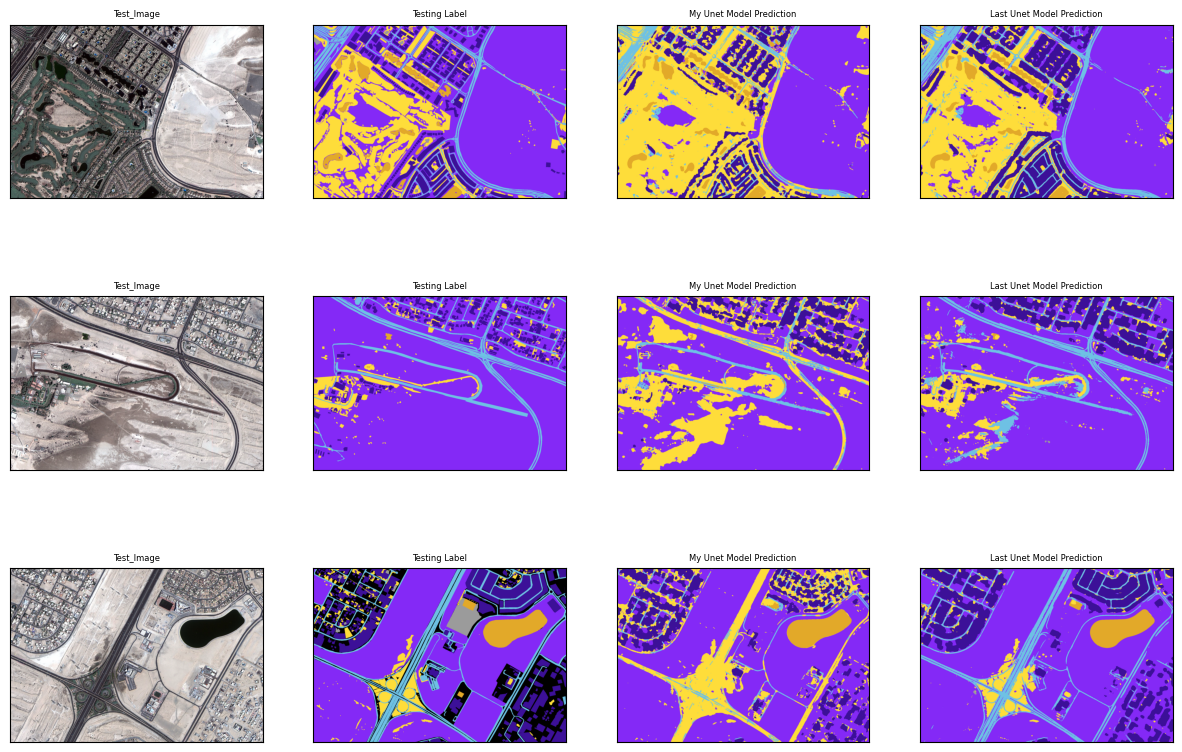

In [55]:
fig, axis = plt.subplots(3, 4)
fig.set_figwidth(15)
fig.set_figheight(10)

for img_num in range(test_num_images):   
    
    test_image = cv2.imread(os.path.join(test_img_dir, test_img_list[img_num]), 1)
    axis[img_num][0].imshow(test_image)
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)

    test_mask = cv2.imread(os.path.join(test_mask_dir, test_mask_list[img_num]), 1)
    test_mask = cv2.cvtColor(test_mask, cv2.COLOR_BGR2RGB)
    axis[img_num][1].imshow(test_mask)
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(label_to_rgb(unet_like_predicted_masks[img_num]))
    axis[img_num][2].set_title("My Unet Model Prediction", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(label_to_rgb(last_unet_predictions[img_num]))
    axis[img_num][3].set_title("Last Unet Model Prediction", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    
plt.show()

Задание №3. Используйте модель с Unet-подобной архитектурой для решения задач №2 и №3 из практической работы №6

Работа 6.2. Удаление шума

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from imutils.paths import list_images

from tensorflow.keras.applications import VGG16

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Conv2DTranspose, BatchNormalization, Dropout, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.models import load_model

import numpy as np

import cv2

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [7]:
seed=24
batch_size=20

In [8]:
def preprocess_data(source, target):

    source = source.astype('float32') / 255.0
    target = target.astype('float32') / 255.0
    
    return (source, target)

In [9]:
def trainGenerator(noise_path, clean_path):   
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    image_generator = image_datagen.flow_from_directory(
        noise_path,
        color_mode='rgb',
        target_size=(224, 224),
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    target_datagen = ImageDataGenerator(**img_data_gen_args)
    target_generator = target_datagen.flow_from_directory(
        clean_path,
        color_mode='rgb',
        target_size=(224, 224),
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, target_generator)
    
    for (img, target) in train_generator:
        processed_img, processed_target = preprocess_data(img, target)
        yield (processed_img, processed_target)

In [10]:
source_path = '../Практическая работа №6/datasets/noisy'
target_path = '../Практическая работа №6/datasets/clean'

train_img_gen = trainGenerator(source_path, target_path)

train_steps_count = len(list(list_images(source_path))) // batch_size
print(f'Train generator steps per epoch: {train_steps_count}')

Train generator steps per epoch: 225


In [11]:
input_layer = Input((224, 224, 3), name = 'input_1')

conv_1        = Conv2D(filters = 16,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_1')(input_layer)
batchnorm_1   = BatchNormalization(name = 'batchnorm_1')(conv_1)
dropout_1     = Dropout(0.1, name = 'dropout_1')(batchnorm_1)
conv_2        = Conv2D(filters = 16,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_2')(dropout_1)
batchnorm_2   = BatchNormalization(name = 'batchnorm_2')(conv_2)
dropout_2     = Dropout(0.1, name = 'dropout_2')(batchnorm_2)
pool_1        = MaxPooling2D(pool_size = (2, 2), name = 'pool_1')(dropout_2)
conv_3        = Conv2D(filters = 32,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_3')(pool_1)
batchnorm_3   = BatchNormalization(name = 'batchnorm_3')(conv_3)
dropout_3     = Dropout(0.1, name = 'dropout_3')(batchnorm_3)
conv_4        = Conv2D(filters = 32,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_4')(dropout_3)
batchnorm_4   = BatchNormalization(name = 'batchnorm_4')(conv_4)
dropout_4     = Dropout(0.1, name = 'dropout_4')(batchnorm_4)
pool_2        = MaxPooling2D(pool_size = (2, 2), name = 'pool_2')(dropout_4)
conv_5        = Conv2D(filters = 64,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_5')(pool_2)
batchnorm_5   = BatchNormalization(name = 'batchnorm_5')(conv_5)
dropout_5     = Dropout(0.1, name = 'dropout_5')(batchnorm_5)
conv_6        = Conv2D(filters = 64,  kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_6')(dropout_5)
batchnorm_6   = BatchNormalization(name = 'batchnorm_6')(conv_6)
dropout_6     = Dropout(0.1, name = 'dropout_6')(batchnorm_6)
pool_3        = MaxPooling2D(pool_size = (2, 2), name = 'pool_3')(dropout_6)
conv_7        = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_7')(pool_3)
batchnorm_7   = BatchNormalization(name = 'batchnorm_7')(conv_7)
dropout_7     = Dropout(0.1, name = 'dropout_7')(batchnorm_7)
conv_8        = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_8')(dropout_7)
batchnorm_8   = BatchNormalization(name = 'batchnorm_8')(conv_8)
dropout_8     = Dropout(0.1, name = 'dropout_8')(batchnorm_8)
pool_4        = MaxPooling2D(pool_size = (2, 2), name = 'pool_4')(dropout_8)
conv_9        = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_9')(pool_4)
batchnorm_9   = BatchNormalization(name = 'batchnorm_9')(conv_9)
dropout_9     = Dropout(0.1, name  ='dropout_9')(batchnorm_9)
conv_10       = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_10')(dropout_9)
batchnorm_10  = BatchNormalization(name = 'batchnorm_10')(conv_10)
dropout_10    = Dropout(0.1, name = 'dropout_10')(batchnorm_10)

upconv_1      = Conv2DTranspose(filters = 128, kernel_size = (2, 2), strides = (2, 2), name = 'upconv_1')(dropout_10)
conv_11       = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_11')(upconv_1)
concat_1      = concatenate([conv_11, conv_8])
batchnorm_11  = BatchNormalization(name = 'batchnorm_11')(concat_1)
dropout_11    = Dropout(0.1, name = 'dropout_11')(batchnorm_11)
upconv_2      = Conv2DTranspose(filters = 64, kernel_size = (2, 2), strides = (2, 2), name = 'upconv_2')(dropout_11)
conv_12       = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_12')(upconv_2)
concat_2      = concatenate([conv_12, conv_6])
batchnorm_12  = BatchNormalization(name = 'batchnorm_12')(concat_2)
dropout_12    = Dropout(0.1, name = 'dropout_12')(batchnorm_12)
upconv_3      = Conv2DTranspose(filters = 32, kernel_size = (2, 2), strides = (2, 2), name = 'upconv_3')(dropout_12)
conv_13       = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv_13')(upconv_3)
concat_3      = concatenate([conv_13, conv_4])
batchnorm_13  = BatchNormalization(name = 'batchnorm_13')(concat_3)
dropout_13    = Dropout(0.1, name = 'dropout_13')(batchnorm_13)
upconv_4      = Conv2DTranspose(filters = 16, kernel_size = (2, 2), strides = (2, 2), name = 'upconv_4')(dropout_13)
conv_14       = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', name = 'conv_14')(upconv_4)
concat_4      = concatenate([conv_14, conv_2])
conv_15       = Conv2D(filters = 3, kernel_size = (1, 1), activation = 'sigmoid', name = 'conv_15')(concat_4)

my_unet_model_1 = Model(inputs = input_layer, outputs = conv_15, name = 'model')
my_unet_model_1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [12]:
my_unet_model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 224, 224, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batchnorm_1 (BatchNormalizatio  (None, 224, 224, 16  64         ['conv_1[0][0]']                 
 n)                             )                                                             

In [14]:
my_unet_model_1_history = my_unet_model_1.fit(
    train_img_gen,
    steps_per_epoch=train_steps_count,
    epochs=10,
)

Epoch 1/10
  2/225 [..............................] - ETA: 17s - loss: 0.0074 - accuracy: 0.7714

225/225 [==============================] - 11s 51ms/step - loss: 0.0063 - accuracy: 0.7835
Epoch 2/10
225/225 [==============================] - 12s 52ms/step - loss: 0.0060 - accuracy: 0.8000
Epoch 3/10
225/225 [==============================] - 12s 53ms/step - loss: 0.0056 - accuracy: 0.8035
Epoch 4/10
225/225 [==============================] - 11s 51ms/step - loss: 0.0055 - accuracy: 0.8124
Epoch 5/10
225/225 [==============================] - 12s 51ms/step - loss: 0.0055 - accuracy: 0.8120
Epoch 6/10
225/225 [==============================] - 12s 51ms/step - loss: 0.0052 - accuracy: 0.8183
Epoch 7/10
225/225 [==============================] - 12s 52ms/step - loss: 0.0049 - accuracy: 0.8255
Epoch 8/10
225/225 [==============================] - 11s 50ms/step - loss: 0.0050 - accuracy: 0.8239
Epoch 9/10
225/225 [==============================] - 11s 50ms/step - loss: 0.0047 - accuracy: 0.8309
Epoch 10/10
225/225 [==============================] - 11s 51ms/step - loss: 0.0049 - accurac

In [15]:
my_unet_model_1.save('models/my_unet_model_denoise.h5')

In [18]:
unet_denoise_model = load_model('models/my_unet_model_denoise.h5', compile=False)